In [ ]:
!pip install gym

In [ ]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (555 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of 

In [ ]:
import gym
import matplotlib.pyplot as plt
from gym import wrappers
%matplotlib inline

In [ ]:
all_env = list(gym.envs.registry.all())
for env in list(all_env):
    print(env)

EnvSpec(Copy-v0)
EnvSpec(RepeatCopy-v0)
EnvSpec(ReversedAddition-v0)
EnvSpec(ReversedAddition3-v0)
EnvSpec(DuplicatedInput-v0)
EnvSpec(Reverse-v0)
EnvSpec(CartPole-v0)
EnvSpec(CartPole-v1)
EnvSpec(MountainCar-v0)
EnvSpec(MountainCarContinuous-v0)
EnvSpec(Pendulum-v0)
EnvSpec(Acrobot-v1)
EnvSpec(LunarLander-v2)
EnvSpec(LunarLanderContinuous-v2)
EnvSpec(BipedalWalker-v3)
EnvSpec(BipedalWalkerHardcore-v3)
EnvSpec(CarRacing-v0)
EnvSpec(Blackjack-v0)
EnvSpec(KellyCoinflip-v0)
EnvSpec(KellyCoinflipGeneralized-v0)
EnvSpec(FrozenLake-v0)
EnvSpec(FrozenLake8x8-v0)
EnvSpec(CliffWalking-v0)
EnvSpec(NChain-v0)
EnvSpec(Roulette-v0)
EnvSpec(Taxi-v3)
EnvSpec(GuessingGame-v0)
EnvSpec(HotterColder-v0)
EnvSpec(Reacher-v2)
EnvSpec(Pusher-v2)
EnvSpec(Thrower-v2)
EnvSpec(Striker-v2)
EnvSpec(InvertedPendulum-v2)
EnvSpec(InvertedDoublePendulum-v2)
EnvSpec(HalfCheetah-v2)
EnvSpec(HalfCheetah-v3)
EnvSpec(Hopper-v2)
EnvSpec(Hopper-v3)
EnvSpec(Swimmer-v2)
EnvSpec(Swimmer-v3)
EnvSpec(Walker2d-v2)
EnvSpec(Walker2d

In [ ]:
len(all_env)

859

[link text](https://)## Basic functions and uses of gym environment functions
**make**: make is used to create the selected environment given from the parameters

**reset**: reset the environment to default state

**action_space**: all possible actions for the environment

**observation_space**: all possible observations for the environment

**render**: rendering a visual for each environment

**step**: a function where you pass the action to take for the environment

**observation**: observation noted from the environment

**reward**: reward obtained for taking the step in the environment

**done**: single boolean values which tells if the episode has ended

**info**: additional information used to debug the running of the environment

**wrappers**: extend the environment defined and allow for more features and additionial build details into the environment, can ddefine observation, action and reward wrappers individually


In [ ]:
env = gym.make('Copy-v0') #This task involves copying the symbols from the input tape to the output tape.
env.reset()
env.render()
print(env.action_space)
print(env.observation_space)

Total length of input instance: 4, step: 0
Observation Tape    :   ECEE  
Output Tape         :   
Targets             :   ECEE  






Tuple(Discrete(2), Discrete(2), Discrete(5))
Discrete(6)


In [ ]:
env = gym.make('RepeatCopy-v0') #the goal is to copy the input, revert it and copy it again.
env.reset()
env.render()
print(env.action_space)
print(env.observation_space)

Total length of input instance: 3, step: 0
Observation Tape    :   CBC  
Output Tape         :   
Targets             :   CBCCBCCBC  






Tuple(Discrete(2), Discrete(2), Discrete(5))
Discrete(6)


# Toy_text

Toy environments which are text-based. 

In [ ]:
env = gym.make('FrozenLake-v0') 
env.reset()
env.render()
print(env.action_space)
print(env.observation_space)


SFFF
FHFH
FFFH
HFFG
Discrete(4)
Discrete(16)


In [ ]:
import gym
env = gym.make('FrozenLake8x8-v0') #finding a walkable path to a goal tile.
env.reset()
env.render()
print(env.action_space)
print(env.observation_space)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Discrete(4)
Discrete(64)


#For rendering

The Gym will normally render the display using GL on the screen. But Colab is run on the web as a notebook, it can’t display directly to the screen. It can only show the result through HTML.

One way to render gym environment, the animation, in google colab is to use pyvirtualdisplay and store rgb frame array while running environment. Environment frames can be animated using animation feature of matplotlib and HTML function used for Ipython display module.

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only


import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
pip install pyglet

#Classic control

These are a variety of classic control tasks, which would appear in a typical reinforcement learning textbook. If you didn't do the full install, you will need to run pip install -e '.[classic_control]' to enable rendering. 

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


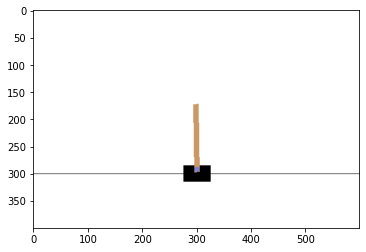

In [ ]:
import gym
import pyglet
env = gym.make('CartPole-v1')
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

array([ 0.03117872, -0.04776827,  0.01454037,  0.02486047])

In [ ]:
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action space: Discrete(2)


In [ ]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC ROMS/BY ALPHABET (PAL)/

Discrete(6)
Box(0, 255, (210, 160, 3), uint8)


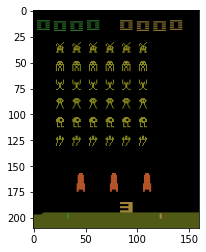

In [ ]:
env = gym.make('SpaceInvaders-v0') 
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

Discrete(18)
Box(0, 255, (128,), uint8)


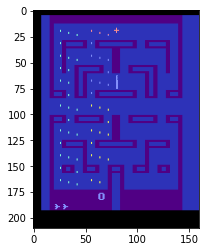

In [ ]:
import gym
env = gym.make('Alien-ram-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

In [ ]:
#Box2d

It is a 2D physics engine. 

#Box2d

It is a 2D physics engine. 

In [ ]:
pip install gym[box2d]

     |████████████████████████████████| 448 kB 5.4 MB/s 


Discrete(4)
Box(-inf, inf, (8,), float32)


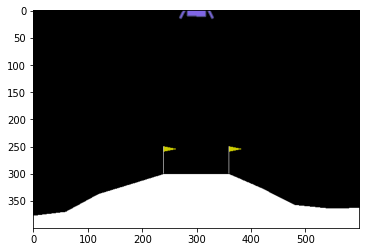

In [ ]:
import gym
env = gym.make('LunarLander-v2')
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

Box(-1.0, 1.0, (4,), float32)
Box(-inf, inf, (24,), float32)


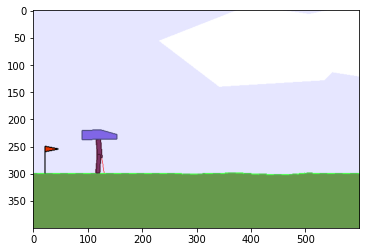

In [ ]:
import gym
env = gym.make('BipedalWalker-v3')
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

In [ ]:
env = gym.make('CartPole-v0')
env.reset()
for _ in range(10):
    action = env.action_space.sample()
    print('action', action)
    observation, reward, done, info = env.step(action)
    print(observation, reward, done, info)
    if done:
        break
env.close()

action 0
[ 0.02781438 -0.23189402  0.01890407  0.31277493] 1.0 False {}
action 0
[ 0.0231765  -0.42728011  0.02515956  0.61135916] 1.0 False {}
action 1
[ 0.0146309  -0.23251867  0.03738675  0.3267056 ] 1.0 False {}
action 0
[ 0.00998053 -0.42815241  0.04392086  0.63094029] 1.0 False {}
action 1
[ 0.00141748 -0.23366992  0.05653967  0.35240647] 1.0 False {}
action 0
[-0.00325592 -0.42954839  0.06358779  0.66236847] 1.0 False {}
action 0
[-0.01184689 -0.62549474  0.07683516  0.97437619] 1.0 False {}
action 1
[-0.02435678 -0.43148293  0.09632269  0.7067844 ] 1.0 False {}
action 1
[-0.03298644 -0.23781806  0.11045838  0.44590877] 1.0 False {}
action 1
[-0.0377428  -0.04441796  0.11937655  0.18998536] 1.0 False {}


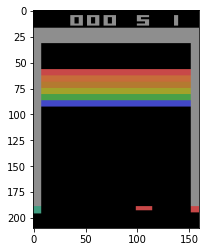

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(4)


In [ ]:
env = gym.make('Breakout-v0')

plt.imshow(env.render('rgb_array'))
plt.show()
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [ ]:
env = gym.make('Taxi-v3')
env.reset()
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Discrete(500)
Action space: Discrete(6)
